## Prediction using UnSupervised ML

## Name: Suraj Kumar

In this task, We are going to predict  the optimum number of cluster from the given iris Dataset and represent it visually. This incluids unspuervised Learning.

In [1]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 1- Reading the Data-set

In [2]:
#importing and reaading the dataset
data= pd.read_csv("C:\\Users\\DELL\\Downloads\\Iris.csv")

In [3]:
#the first five values in the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#the last five values in the dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Checking for NaN values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

NaN standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. For example, 00 is undefned as a real humber and is, therefore, represented by NaN. So, in this dataset, we don't have such values.

In [7]:
# Checking statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Now, let's check for unique classes in the dataset.

In [8]:
data.Species.nunique()
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Step 2 - Data Visualization

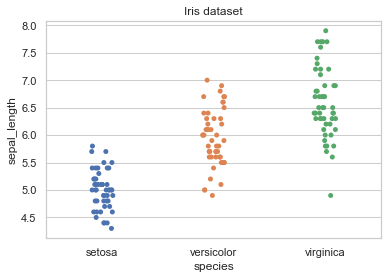

In [9]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x = 'species' ,y = 'sepal_length' ,data = iris);
plt.title('Iris dataset')
plt.show()

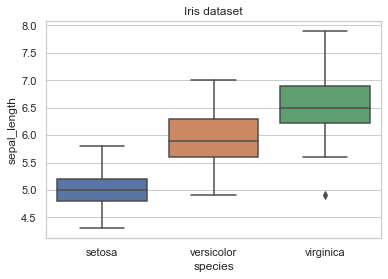

In [10]:
sns.boxplot(x = 'species' ,y = 'sepal_length' ,data = iris);
plt.title('Iris dataset')
plt.show()

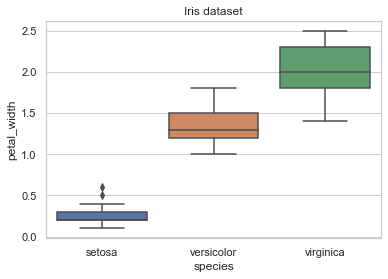

In [11]:
sns.boxplot(x = 'species' ,y = 'petal_width' ,data = iris);
plt.title('Iris dataset')
plt.show()

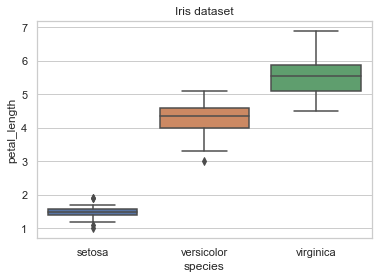

In [12]:
sns.boxplot(x = 'species' ,y = 'petal_length' ,data = iris);
plt.title('Iris dataset')
plt.show()

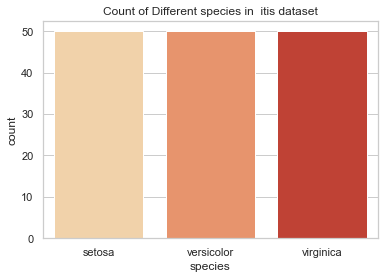

In [13]:
#count plot 
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of Different species in  itis dataset")
plt.show()

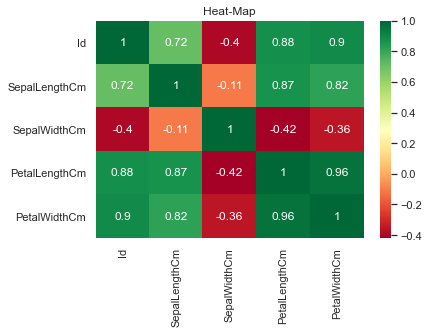

In [14]:
# Heat Map
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

## Step 3 - Finding  the Optimum number of cluster using K-means Clustering

In [15]:
# Finding the Optimum number of cluster usning K-means

x = data.iloc[:,[0,1,2,3]].values 

from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the WCSS to the list (kmeans.inertia_ return the WCSS values value for an initialized cluster)
    wcss.append(kmeans.inertia_)
    print('k:', i , "wcss:",kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023802
k: 6 wcss: 7921.863473076923
k: 7 wcss: 5911.632365518538
k: 8 wcss: 4541.979023391812
k: 9 wcss: 3571.911095588236
k: 10 wcss: 2943.9331008403374


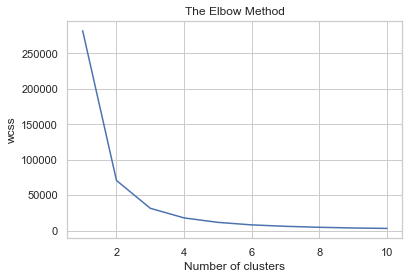

In [16]:
# Ploting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

We can see that after 3 the drop in WCSS in minimal. So we choose 3 as the optimal number of clusters.

## Step 4 - Intializing K-Means With Optimum Number Of Clusters

In [17]:
# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Return a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

##  Step 5 - Predicting Values

In [18]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##  Step 6 - Visualizing  the Clusters

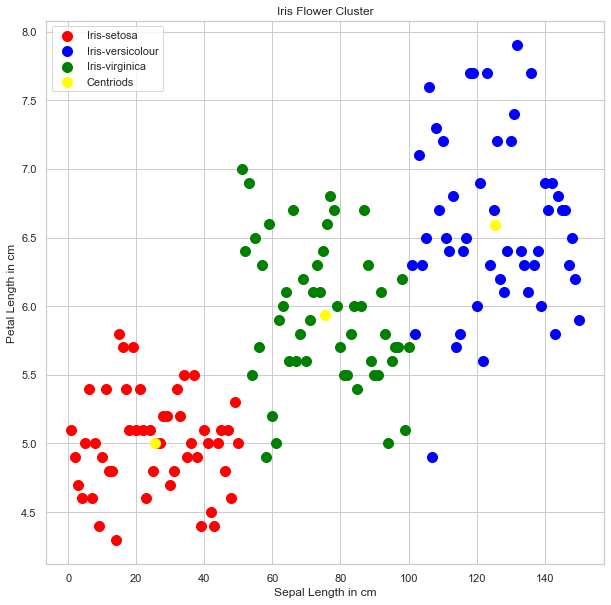

In [19]:
# Visualizing the Clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris-virginica')

# plotting the centriods of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label= 'Centriods')
plt.title('Iris Flower Cluster')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()